# Face Detection

## Function 

In [0]:
import glob
import cv2
import matplotlib.pyplot as plt

# ฟังก์ชันค้นหารูปภาพ
def path_image(path):
  all_files = glob.iglob(path + '*.[jp]*[g]', recursive=True)
  path_img = []   #path_img = list()  #create empty list
  for file in all_files:
    path_img.append(file)

  return path_img

# ฟังก์ชันอ่านรูปภาพ
def cv_read_image(path):
  img = cv2.imread(path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  return img_rgb  

### แสดงรูปภาพใน Folder/Directory

/content/people-01.jpg
/content/people-04.jpg
/content/people-03.jpg


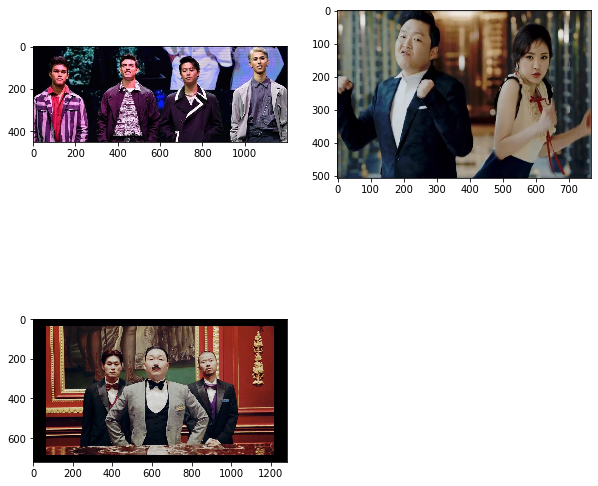

In [0]:
import math 

path = '/content/'
path_img = path_image(path)

# แสดงชื่อไฟล์รูปภาพ
for p in path_img:
  print(p)

# แสดงรูปภาพ
r =  math.floor(math.sqrt(len(path_img))) + 1

plt.figure(figsize=(10,10))
for idx, p_img in enumerate(path_img):
  try:
    plt.subplot(r, r, idx+1) 
    img = cv_read_image(p_img)  
    plt.imshow(img)
  except:
    pass
      
plt.show()

## โหลดโมเดลใบหน้าที่สร้างด้วยวิธี Haar-Cascade Classifier มาใช้งาน

In [0]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-12-16 06:45:40--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2019-12-16 06:45:41 (35.3 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



## ค้นหาใบหน้า

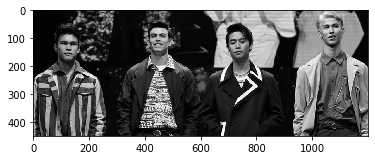

In [0]:
# ในวิธี Haar-cascade classifier จะใช้รูปภาพสีเทาในการค้นหาใบหน้า
img = cv_read_image(path_img[0])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.gray()
plt.imshow(img_gray)
plt.show()

In [0]:
import numpy as np

# copy array
img_face = np.array(img, copy=True)

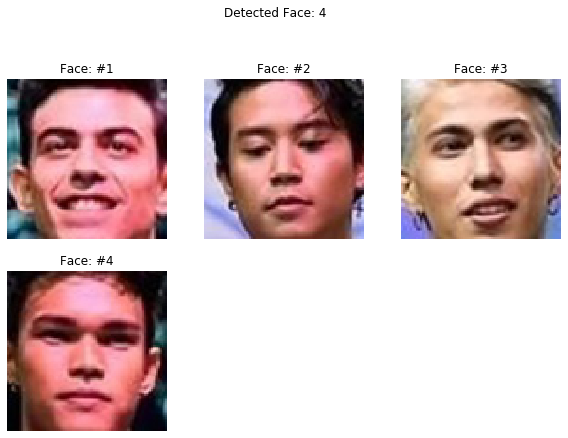

In [0]:
# Haar cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# ค้นหาใบหน้า ต้องใช้รูปภาพสีเทาในการหา
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5, 0)
#print('Detected Face:', len(faces))

# แสดงรูปภาพ
fig = plt.figure(figsize=(10,10))
suptitle = 'Detected Face: ' + str(len(faces))
fig.suptitle(suptitle)

r =  math.floor(math.sqrt(len(faces))) + 1

# วาดกรอบสี่เหลี่ยมรอบใบหน้า
f_no = 1
for idx, (x,y,w,h) in enumerate(faces):
  try:
    plt.subplot(r, r, idx+1) 
    plt.axis('off')
    cv2.rectangle(img_face,(x,y),(x+w,y+h),(0,0,255),2)
    img_crop = img[y:y+h, x:x+w]
    title = 'Face: #'+ str(idx+1)
    plt.title(title)
    plt.imshow(img_crop)
  except:
    pass
plt.show()

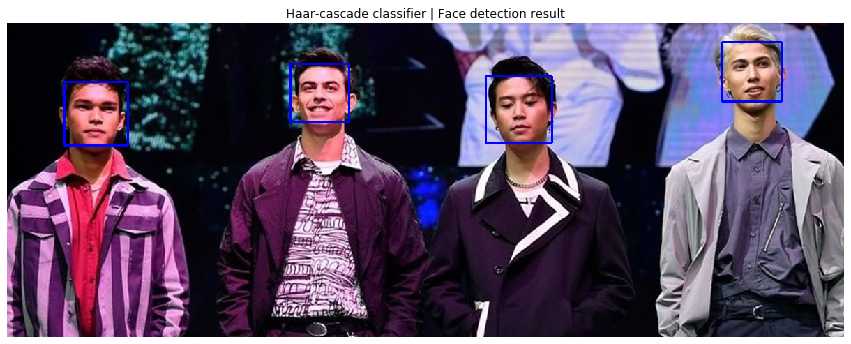

In [0]:
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('Haar-cascade classifier | Face detection result')
plt.imshow(img_face)
plt.show()

## สร้างฟังก์ชันการค้นหาใบหน้า face detection

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def face_detection(imgy, scaleFactor=1.1, minNeighbors=3, verbose=True):
  # Haar cascade classifier
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  # ค้นหาใบหน้า ต้องใช้รูปภาพสีเทาในการหา
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors, 0)
  #print('Detected Face:', len(faces))

  # copy array
  img_face = np.array(img, copy=True)

  # แสดงรูปภาพ
  if(verbose):
    fig = plt.figure(figsize=(10,10))
    suptitle = 'Detected Face: ' + str(len(faces))
    fig.suptitle(suptitle)    

  # วาดกรอบสี่เหลี่ยมรอบใบหน้า
  r =  math.floor(math.sqrt(len(faces))) + 1
  f_no = 1
  for idx, (x,y,w,h) in enumerate(faces):
    try:
      cv2.rectangle(img_face,(x,y),(x+w,y+h),(0,0,255),2)
      if(verbose):
        plt.subplot(r, r, idx+1) 
        plt.axis('off')      
        img_crop = img[y:y+h, x:x+w]
        title = 'Face: #'+ str(idx+1)
        plt.title(title)
        plt.imshow(img_crop)
    except:
      pass
  plt.show()

  return img_face 

## แสดงผลลัพธ์จากการค้นหาใบหน้า

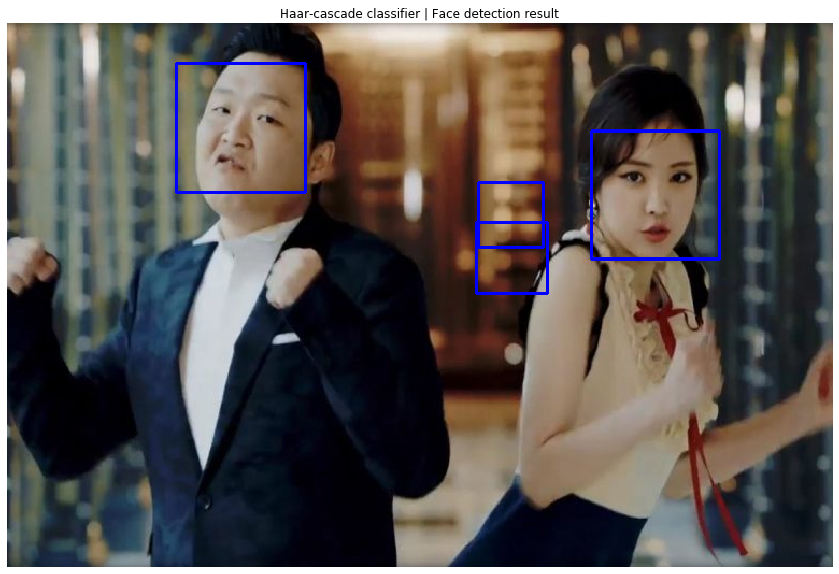

In [0]:
# ในวิธี Haar-cascade classifier จะใช้รูปภาพสีเทาในการค้นหาใบหน้า
img = cv_read_image(path_img[1])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_face = face_detection(img, verbose=False)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('Haar-cascade classifier | Face detection result')
plt.imshow(img_face)
plt.show()

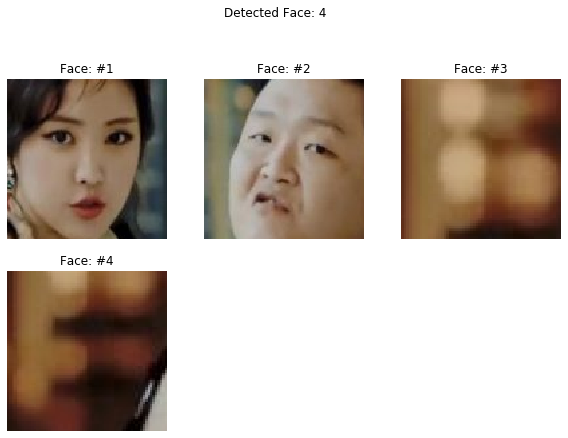

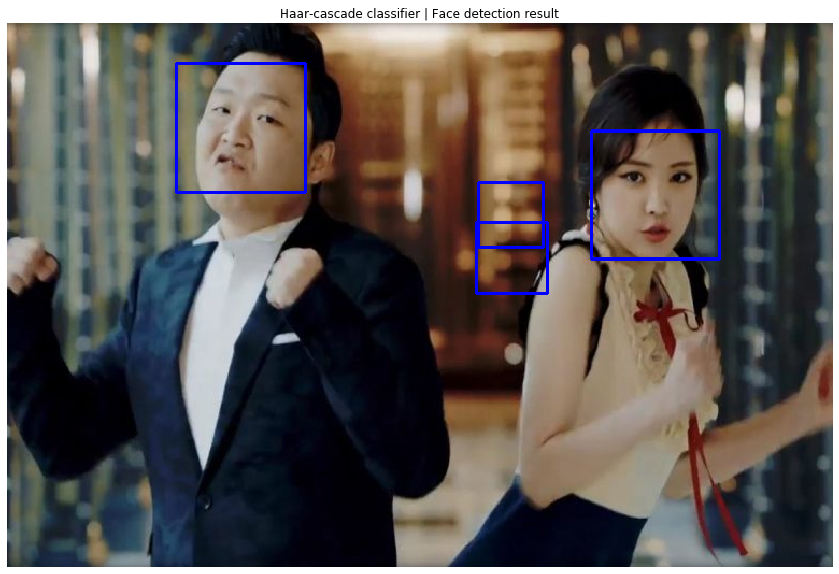

In [0]:
# ในวิธี Haar-cascade classifier จะใช้รูปภาพสีเทาในการค้นหาใบหน้า
img = cv_read_image(path_img[1])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_face = face_detection(img, verbose=True)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('Haar-cascade classifier | Face detection result')
plt.imshow(img_face)
plt.show()

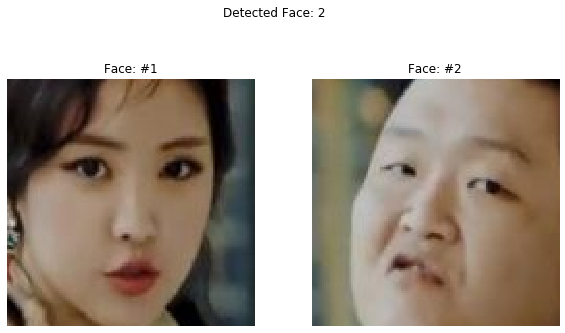

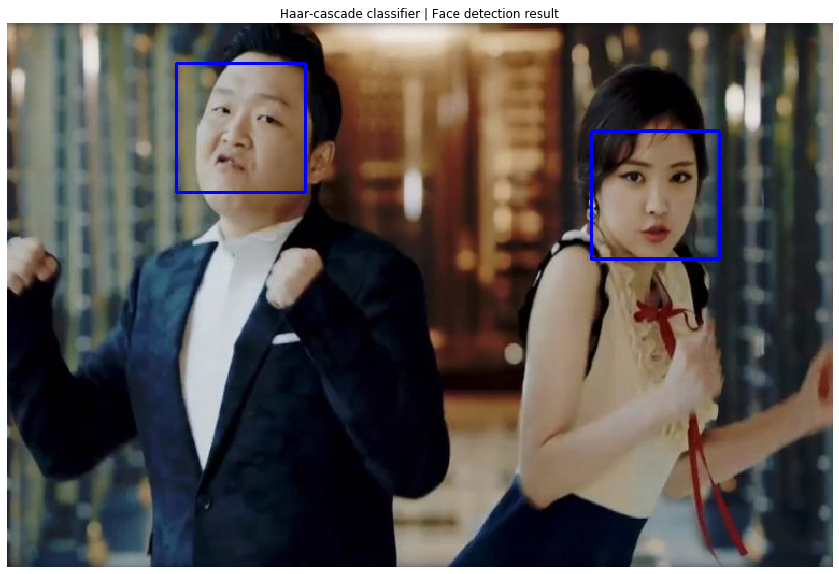

In [0]:
# ในวิธี Haar-cascade classifier จะใช้รูปภาพสีเทาในการค้นหาใบหน้า
img = cv_read_image(path_img[1])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_face = face_detection(img, scaleFactor=1.1, minNeighbors=5, verbose=True)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('Haar-cascade classifier | Face detection result')
plt.imshow(img_face)
plt.show()

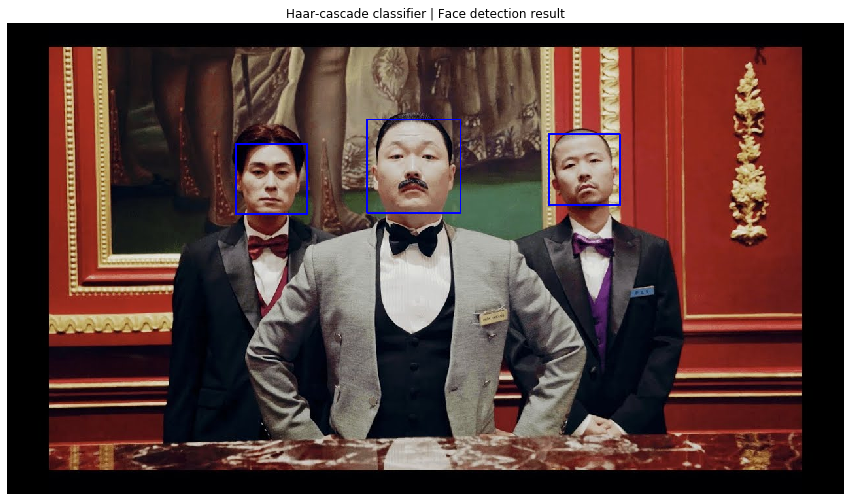

In [0]:
# ในวิธี Haar-cascade classifier จะใช้รูปภาพสีเทาในการค้นหาใบหน้า
img = cv_read_image(path_img[2])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_face = face_detection(img, scaleFactor=1.3, minNeighbors=5, verbose=False)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('Haar-cascade classifier | Face detection result')
plt.imshow(img_face)
plt.show()